the weight of Logistic Regression:
 [[-0.45928925  0.83069893 -2.26606528 -0.99743983]
 [ 0.33117319 -0.72863427 -0.06841147 -0.98711029]
 [ 0.12811605 -0.10206466  2.33447675  1.98455011]]
the intercept(w0) of Logistic Regression:
 [  9.43880648   3.93047366 -13.36928014]
The test predict Probability of each class:
 [[1.03461744e-05 2.33279482e-02 9.76661706e-01]
 [9.69926591e-01 3.00732871e-02 1.21677013e-07]
 [2.09992556e-02 8.69156613e-01 1.09844131e-01]
 [3.61934880e-03 7.91979964e-01 2.04400687e-01]
 [7.90943230e-03 8.00605296e-01 1.91485272e-01]
 [7.30034943e-04 6.60508053e-01 3.38761912e-01]
 [1.68614215e-04 1.86322047e-01 8.13509339e-01]
 [1.06915328e-01 8.90815535e-01 2.26913684e-03]
 [9.46928073e-01 5.30707270e-02 1.20016068e-06]
 [9.62346387e-01 3.76532213e-02 3.91897322e-07]
 [1.19533394e-04 1.38823471e-01 8.61056996e-01]
 [8.78881872e-03 6.97207354e-01 2.94003828e-01]
 [9.73938144e-01 2.60617330e-02 1.22613847e-07]
 [1.78434059e-03 4.79518175e-01 5.18697484e-01]
 [5.56924

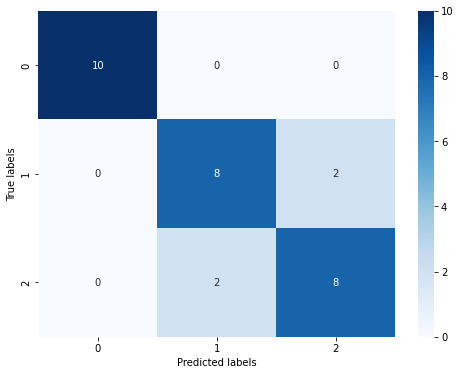

In [1]:
##  基础函数库
import numpy as np 
import pandas as pd
import seaborn as sns

## 绘图函数库
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##我们利用sklearn中自带的iris数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式码片


##测试集大小为20%，80%/20%分
x_train,x_test,y_train,y_test=train_test_split(iris_features,iris_target,test_size=0.2,random_state=2020)
##定义逻辑回归模型
clf=LogisticRegression(random_state=0,solver='lbfgs')
##在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)
##查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)
##查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)
##由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类
##在训练集和测试集上分布利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)
##由于逻辑回归模型是概率预测模型（前文介绍的p=p(y=1|x,\theta)）,所有我们可以利用predict_proba函数预测其概率

train_predict_proba=clf.predict_proba(x_train)
test_predict_proba=clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
##其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

##利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))
##查看混淆矩阵
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

##对于结果进行可视化
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

##The confusion matrix result:
##[[10  0   0]
##[0   7   3] 
##[0   3   7]]
